## Assignment 1.1: Statistics

In [27]:
import pandas as pd

# Loading the dataset
df = pd.read_csv('./data/players.csv')

# Displaying the first few rows
print(df.head())


         Player Name  Age  Height  Weight Position  Goals  Assists  \
0       Lionel Messi   34     170      72  Forward     30       15   
1  Cristiano Ronaldo   36     187      83  Forward     25       10   
2          Neymar Jr   29     175      68  Forward     20       20   
3      Kylian Mbappe   22     178      73  Forward     29       12   
4      Mohamed Salah   29     175      71  Forward     23        9   

   Pass Accuracy  Shots on Target  Tackles  Interceptions  
0           87.5               60       20             10  
1           82.3               55       15              5  
2           88.2               50       18             12  
3           85.6               52       22             10  
4           82.3               45       18              8  


In [28]:
# Printing a concise summary
df.info()

# Printing summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player Name      34 non-null     object 
 1   Age              34 non-null     int64  
 2   Height           34 non-null     int64  
 3   Weight           34 non-null     int64  
 4   Position         34 non-null     object 
 5   Goals            34 non-null     int64  
 6   Assists          34 non-null     int64  
 7   Pass Accuracy    34 non-null     float64
 8   Shots on Target  34 non-null     int64  
 9   Tackles          34 non-null     int64  
 10  Interceptions    34 non-null     int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 3.1+ KB


,Age,Height,Weight,Goals,Assists,Pass Accuracy,Shots on Target,Tackles,Interceptions
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,29.500000,182.911765,78.264706,8.058824,5.852941,83.817647,19.382353,16.617647,11.000000
std,3.807887,6.859489,8.147537,9.679535,5.842023,6.089856,19.403240,11.409764,8.506682
min,22.000000,170.000000,64.000000,0.000000,0.000000,68.000000,0.000000,0.000000,0.000000
25%,27.000000,178.000000,71.250000,1.000000,0.250000,82.025000,2.750000,10.000000,5.000000
50%,29.500000,183.500000,78.000000,3.500000,4.500000,85.000000,13.000000,16.500000,10.000000
75%,32.500000,188.000000,84.750000,13.750000,10.000000,88.075000,33.750000,21.500000,15.000000
max,36.000000,196.000000,92.000000,30.000000,20.000000,91.800000,60.000000,41.000000,32.000000


In [29]:
# Printing the data types of each column
df.dtypes

Player Name         object
Age                  int64
Height               int64
Weight               int64
Position            object
Goals                int64
Assists              int64
Pass Accuracy      float64
Shots on Target      int64
Tackles              int64
Interceptions        int64
dtype: object

## Assignment 1.2: Visualization

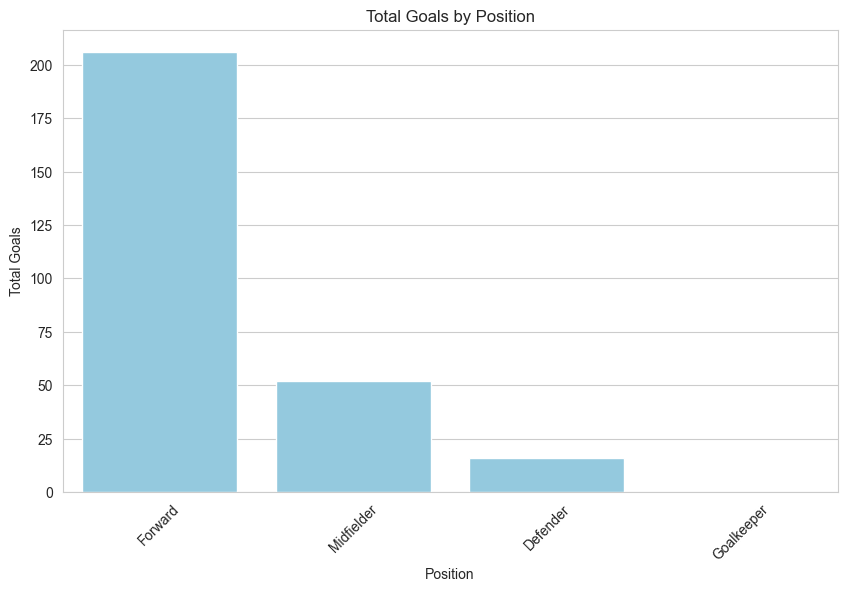

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Position', 
    y='Goals', 
    data=df, 
    estimator=sum, 
    errorbar=None,  
    color='skyblue'  
)
plt.title('Total Goals by Position')
plt.xticks(rotation=45)  
plt.xlabel('Position')
plt.ylabel('Total Goals')
plt.show()


## Assignment 1.3: Grouping

In [31]:
# Selecting columns for aggregation
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Grouping by 'Position' and calculating mean
grouped_df = df.groupby('Position')[numeric_cols].mean()

print(grouped_df)

                  Age      Height     Weight      Goals    Assists  \
Position                                                             
Defender    29.777778  186.444444  82.222222   1.777778   1.444444   
Forward     29.300000  179.900000  74.700000  20.600000  10.200000   
Goalkeeper  30.166667  189.666667  87.333333   0.000000   0.166667   
Midfielder  29.000000  178.222222  72.222222   5.777778   9.222222   

            Pass Accuracy  Shots on Target    Tackles  Interceptions  
Position                                                              
Defender        86.755556         5.222222  24.444444      18.000000  
Forward         83.440000        44.200000  14.300000       7.100000  
Goalkeeper      73.433333         0.000000   0.333333       0.166667  
Midfielder      88.222222        18.888889  22.222222      15.555556  


## Assignment 1.4: Correlations

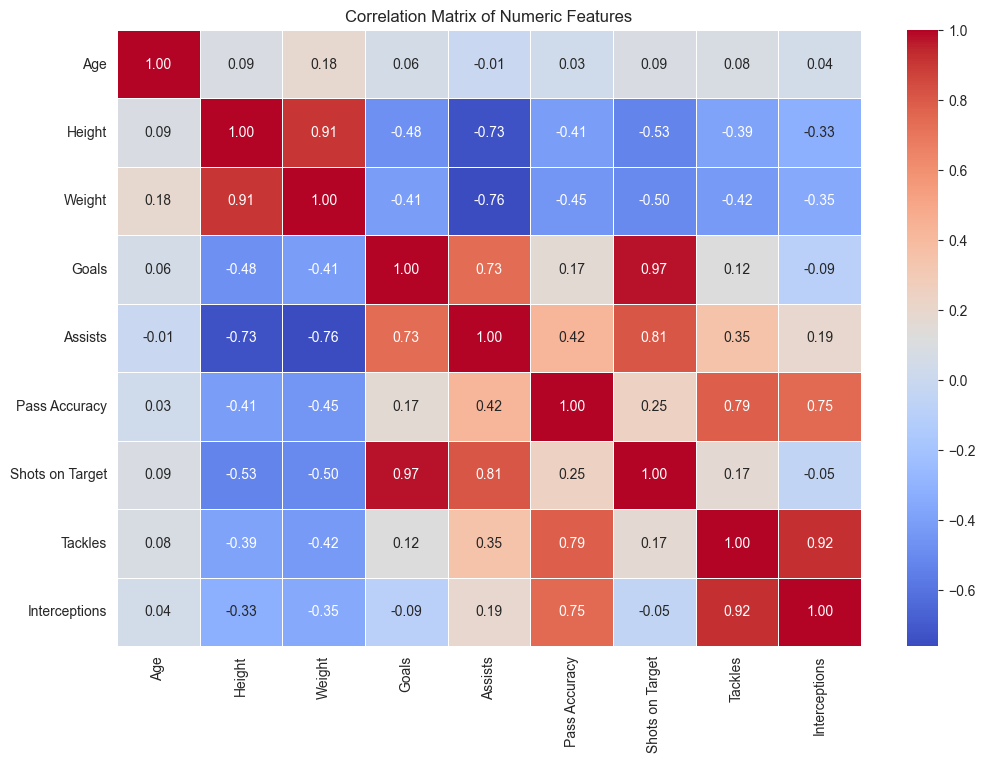

In [32]:
# Selecting numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Computing the correlation matrix
correlation_matrix = numeric_df.corr()

# Using a heatmap to visualize the correlations
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()


## Assignment 1.5: Modeling

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Preparing the data
X = df[['Age', 'Height', 'Weight', 'Pass Accuracy']]
y = df['Goals']

# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
predictions = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 80.18214500714728
R-squared: -0.9843056087627358
